analysis factors of traffic accidents

In [1]:
# -*- coding: utf-8 -*- 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import *
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from dbfread import DBF
import shelve
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
accidents=pd.read_hdf('results/accidents.h5', 'accidents')
vehicles=pd.read_hdf('results/vehicles.h5', 'vehicles')

In [3]:
d = {'STATE': [1,2], 'CASE_NUM': [10001, 100010],'YEAR':[2007,2010]}
df = pd.DataFrame(data=d)
df.index=[1,2]

In [4]:
df

,CASE_NUM,STATE,YEAR
1,10001,1,2007
2,100010,2,2010


In [5]:
person=[]
for i,j in zip(range(2007,2017),range(0,10)):
    person.append(DataFrame(iter(DBF("data/person/person{}.dbf".format(i)))))
    person[j]['YEAR']=i
all_person =pd.concat(person, axis=0,join='inner')
person=all_person[['AGE','SEX','DEATH_YR','ST_CASE','STATE','YEAR']]
person.rename(columns={'ST_CASE':'CASE_NUM'},inplace=True)
person.head()
def make_index(df):
    df['STATE']=df['STATE'].astype(int)
    df['CASE_NUM']=df['CASE_NUM'].astype(int)
    df['YEAR']=df['YEAR'].astype(int)
    df.index = list(df['YEAR'].astype(str) + df['CASE_NUM'].astype(str))
    return df
person=make_index(person)
person.head()

,AGE,SEX,DEATH_YR,CASE_NUM,STATE,YEAR
200710001,26.0,1.0,2007.0,10001,1,2007
200710002,54.0,2.0,0.0,10002,1,2007
200710002,68.0,1.0,2007.0,10002,1,2007
200710002,59.0,1.0,2007.0,10002,1,2007
200710002,69.0,1.0,0.0,10002,1,2007


In [14]:
def make_index(df):
    df['STATE']=df['STATE'].astype(int)
    df['CASE_NUM']=df['CASE_NUM'].astype(int)
    df['YEAR']=df['YEAR'].astype(int)
    df.index = list(df['YEAR'].astype(str) + df['CASE_NUM'].astype(str))
    return df
en=make_index(person)

In [16]:
person.head()

,AGE,SEX,DEATH_YR,CASE_NUM,STATE,YEAR
200710001,26.0,1.0,2007.0,10001,1,2007
200710002,54.0,2.0,0.0,10002,1,2007
200710002,68.0,1.0,2007.0,10002,1,2007
200710002,59.0,1.0,2007.0,10002,1,2007
200710002,69.0,1.0,0.0,10002,1,2007


In [8]:
fatal_crashs_all = pd.merge(accidents, person, how='inner',on=('STATE','YEAR','CASE_NUM'))
fatal_crashs_all.head()

ValueError: can not merge DataFrame with instance of type <class 'list'>

In [ ]:
#the total accidents number each year, analysis the difference between every year
year_acci=accidents[['YEAR','CASE_NUM']].groupby('YEAR').count()
month_acci=accidents[['MONTH','CASE_NUM']].groupby('MONTH').count()
day_acci=accidents[['DAY_WEEK','CASE_NUM']].groupby('DAY_WEEK').count()
hour_acci=accidents[['HOUR','CASE_NUM']].groupby('HOUR').count()
hour_acci=hour_acci.drop(hour_acci.index[-1])
hour_acci.iloc[0]=hour_acci.iloc[0]+hour_acci.iloc[-1]
hour_acci=hour_acci.drop(hour_acci.index[-1])
day_acci.index = pd.CategoricalIndex(day_acci.index, 
                               categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], 
                               sorted=True)
day_acci = day_acci.sort_index()
month_acci.index=pd.CategoricalIndex(month_acci.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July','August','September','October','November','December'], 
                               sorted=True)
month_acci=month_acci.sort_index()

In [ ]:
import matplotlib.pyplot as plt
f1,axarr = plt.subplots(2,2)
f1.set_figwidth(15)
f1.set_figheight(9)

axarr[0,0].set_ylabel("count")
axarr[0,0].set_title("the total accidents number each year")
axarr[0,0].bar(year_acci.index,year_acci['CASE_NUM'])


objects1=np.array(month_acci.index)
x1=np.arange(len(objects1))
axarr[0,1].set_ylabel("count")
axarr[0,1].set_title("the total accidents number every month")
axarr[0,1].bar(x1,month_acci['CASE_NUM'])
axarr[0,1].set_xticks(x1)
axarr[0,1].set_xticklabels(objects1)

axarr[1,0].set_ylabel("count")
axarr[1,0].set_title("the total accidents number every hour")
axarr[1,0].bar(hour_acci.index,hour_acci['CASE_NUM'])
axarr[1,0].set_xticks(np.arange(0,24))

objects2=np.array(day_acci.index)
x2=np.arange(len(objects2))
axarr[1,1].set_ylabel("count")
axarr[1,1].set_title("the total accidents number every week")
axarr[1,1].bar(x2,day_acci['CASE_NUM'])
axarr[1,1].set_xticks(x2)
axarr[1,1].set_xticklabels(objects2)
f1.savefig("fig/time_relate_count.png")

In [ ]:
fatal_crashs_all.columns

In [ ]:
vehicles.columns

In [ ]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")


In [ ]:
g=sns.factorplot(x="LIGHT_CONDITION", y="DEATHS", hue="DR_DRINK",col="YEAR",data=vehicles, kind="violin", split=True,col_wrap=3,size=3,aspect=2)
g.set_axis_labels("light_condition", "deaths")


In [32]:
def fatal_accident_location(data):
    f, ax = plt.subplots(1,1, figsize=(16,9))
    m = Basemap(projection='lcc', resolution='l', llcrnrlon=-119, urcrnrlon=-64, llcrnrlat=22, urcrnrlat=49,
            lat_1=33, lat_2=45, lon_0=-95,area_thresh=10000)
    lat = data.LATITUDE.values
    lon = data.LONGITUD.values
    # Draw map background
    m.fillcontinents(color='white', lake_color='#eeeeee')
    m.drawstates(color='lightgray')
    m.drawcoastlines(color='lightgray')
    m.drawcountries(color='lightgray')
    m.drawmapboundary(color='gray', fill_color='#eeeeee')
    # Plot accident location
    m.scatter(lon,lat,latlon=True, s=1, marker='o', alpha=0.2, zorder=2)
    plt.title('fatal_accident_location')

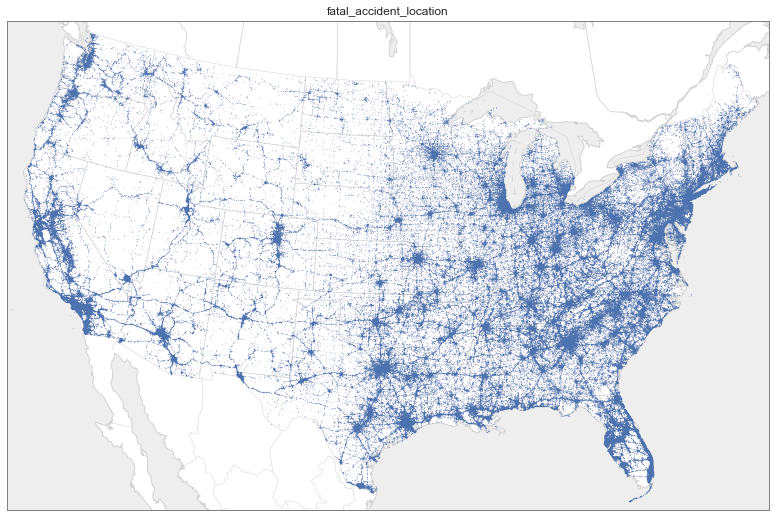

In [33]:
fatal_accident_location(accidents)